In [1]:
import numpy as np
import random

#     # some_file.py
# import sys
#     # caution: path[0] is reserved for script path (or '' in REPL)
# sys.path.insert(1, '/home/jbara/Documents/Warwick/PhD/Collaborators/Fernando/Spatial pollution/Code')
# import pollution
# from pollution import Agent

import matplotlib.pyplot as plt
import matplotlib
from tqdm import trange
import tqdm
import os
import imageio
import math
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
import networkx as nx
import os
import math
import matplotlib.ticker as mtick
import ipywidgets as widgets
from scipy.optimize import minimize_scalar, minimize
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator
import scipy as sp

font = {        'size'   : 20}
mpl.rc('font', **font)
# mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rc('font',**{'family':'sans-serif','sans-serif':['Nimbus Sans']})
# mpl.rc('text', usetex=True)
# %matplotlib notebook

In [2]:
from scipy import integrate

In [3]:
def f_dd(x,par):
    mu,x1,R,_ = par
    res = (np.abs(x)<1)*1 + (np.abs(x-x1)<1)*1 + np.abs(x-x1)*mu
    if (np.abs(x)>=1)&(np.abs(x)<R):
        res += 1/x**2
    if (np.abs(x-x1)>=1)&(np.abs(x-x1)<R):
        res += 1/(x-x1)**2
    return res

def f_dc(x,par):
    mu,x1,R,phi = par
    res = (np.abs(x)<1)*1 - (np.abs(x-x1)<=1)*phi + np.abs(x-x1)*mu
    if (np.abs(x)>=1)&(np.abs(x)<R):
        res += 1/x**2
    return res

def f_cd(x,par):
    mu,x1,R,phi = par
    res = (np.abs(x)<=1)*(-1*phi) + (np.abs(x-x1)<1)*1 + np.abs(x-x1)*mu
    if (np.abs(x-x1)>=1)&(np.abs(x-x1)<R):
        res += 1/(x-x1)**2
    return res

def f_cc(x,par):
    mu,x1,R,phi = par
    res = (np.abs(x)<=1)*(-1*phi) + (np.abs(x-x1)<=1)*(-1*phi) + np.abs(x-x1)*mu
    return res

In [4]:
# vector versions
def v_dd(x,par):
    mu,x1,R,_ = par
    res=np.abs(x-x1)*mu
    res[np.abs(x)<1]+=1 
    res[(np.abs(x-x1)<1)]+=1 
    res[(np.abs(x)>=1)&(np.abs(x)<R)]+= 1/x[(np.abs(x)>=1)&(np.abs(x)<R)]**2
    res[(np.abs(x-x1)>=1)&(np.abs(x-x1)<R)]+= 1/(x[(np.abs(x-x1)>=1)&(np.abs(x-x1)<R)]-x1)**2
    return res

def v_dc(x,par):
    mu,x1,R,phi = par
    res = np.abs(x-x1)*mu
    res[(np.abs(x)<1)]+=1
    res[(np.abs(x-x1)<=1)]-=phi
    res[(np.abs(x)>=1)&(np.abs(x)<R)]+= 1/x[(np.abs(x)>=1)&(np.abs(x)<R)]**2
    return res

def v_cd(x,par):
    mu,x1,R,phi = par
    res=np.abs(x-x1)*mu
    res[(np.abs(x)<=1)]-=phi 
    res[(np.abs(x-x1)<1)]+=1 
    res[(np.abs(x-x1)>=1)&(np.abs(x-x1)<R)] += 1/(x[(np.abs(x-x1)>=1)&(np.abs(x-x1)<R)]-x1)**2
    return res

def v_cc(x,par):
    mu,x1,R,phi = par
    res=np.abs(x-x1)*mu
    res[(np.abs(x)<=1)]-=phi
    res[(np.abs(x-x1)<=1)]-=phi
    return res

In [39]:
print(v_dc(candidate_x,(2.3,1,5,5)))

[25.3        23.         20.7        18.4        16.1        13.8
 11.5625      9.31111111  7.15        5.6        -1.7        -4.
 -2.45        4.71111111  6.9625      9.2        11.5        13.8
 16.1        18.4        20.7       ]


In [35]:
print(len(np.abs(candidate_x)>=1))
print(len(np.abs(candidate_x)<5))

21
21


In [6]:
print(f_cc(1.01,(0.01,2,5,5)))

-4.9901


<IPython.core.display.Javascript object>


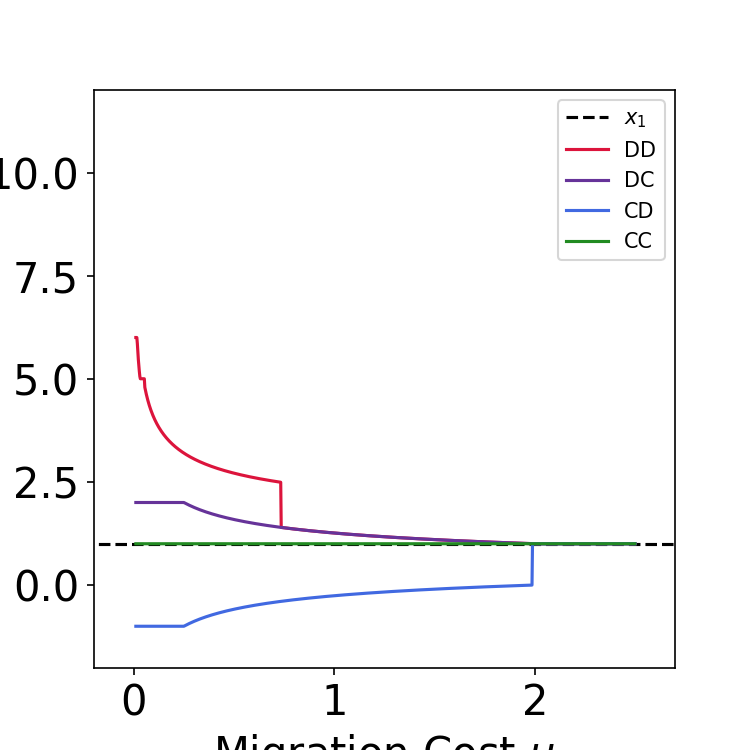

interactive(children=(FloatSlider(value=1.0, description='x1', max=5.0, min=1.0), Dropdown(description='R', in…

In [21]:
mu = np.linspace(0.01,2.5,1000)
fig,ax=plt.subplots(figsize=(5,5))
@widgets.interact(x1=(1,5,0.1),R=[1,2,5,10],phi=[0.5,1,5])
def update(x1=1,R=5,phi=5):
    ax.clear()
    ax.plot([-1,3],[x1,x1],'k--',label='$x_1$')
    gmin_dd = np.array([minimize_scalar(f_dd,method='bounded',
                                        bounds=(-R-0.5,R+x1+0.5),
                                        args=[Mu,x1,R,phi]).x for Mu in mu])
    gmin_dc = np.array([minimize_scalar(f_dc,method='bounded',
                                        bounds=(-R-0.5,R+x1+0.5),
                                        args=[Mu,x1,R,phi]).x for Mu in mu])
    gmin_cd = np.array([minimize_scalar(f_cd,method='bounded',
                                        bounds=(-R-0.5,R+x1+0.5),
                                        args=[Mu,x1,R,phi]).x for Mu in mu])
    gmin_cc = np.array([minimize_scalar(f_cc,method='bounded',
                                        bounds=(-R-0.5,R+x1+0.5),
                                        args=[Mu,x1,R,phi]).x for Mu in mu])
    ax.plot(mu,gmin_dd,c='crimson',label='DD')
    ax.plot(mu,gmin_dc,c='rebeccapurple',label='DC')
    ax.plot(mu,gmin_cd,c='royalblue',label='CD')
    ax.plot(mu,gmin_cc,c='forestgreen',label='CC')
#     xlim = ax.get_xlim()
    ax.legend(fontsize=10)
    ax.set_ylim([-2,12])
    ax.set_xlim([-.2,2.7])
    ax.set_xlabel("Migration Cost $\mu$")
    ax.set_ylabel("Position $x_*$")
    
#     ax.set_xscale('log')
    plt.show()

<IPython.core.display.Javascript object>


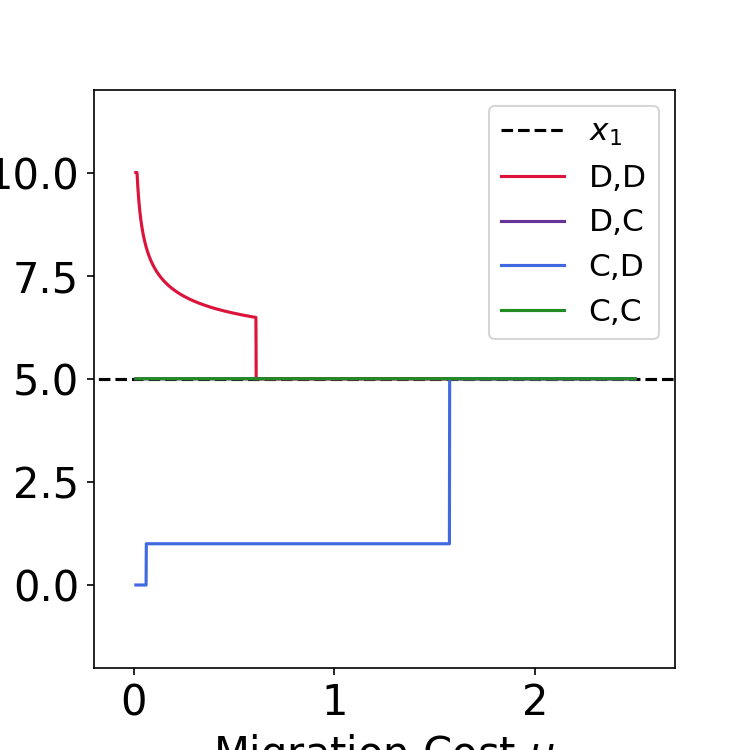

In [24]:
mu = np.linspace(0.01,4,4000)
fig,ax=plt.subplots(figsize=(5,5))
R=5
phi=5
for x1 in range(1,6):
    ax.clear()
    ax.plot([-1,3],[x1,x1],'k--',label='$x_1$')
    gmin_dd = np.array([minimize_scalar(f_dd,method='bounded',
                                        bounds=(-R-0.5,R+x1+0.5),
                                        args=[Mu,x1,R,phi]).x for Mu in mu])
    gmin_dc = np.array([minimize_scalar(f_dc,method='bounded',
                                        bounds=(-R-0.5,R+x1+0.5),
                                        args=[Mu,x1,R,phi]).x for Mu in mu])
    gmin_cd = np.array([minimize_scalar(f_cd,method='bounded',
                                        bounds=(-R-0.5,R+x1+0.5),
                                        args=[Mu,x1,R,phi]).x for Mu in mu])
    gmin_cc = np.array([minimize_scalar(f_cc,method='bounded',
                                        bounds=(-R-0.5,R+x1+0.5),
                                        args=[Mu,x1,R,phi]).x for Mu in mu])
    ax.plot(mu,gmin_dd,c='crimson',label='D,D')
    ax.plot(mu,gmin_dc,c='rebeccapurple',label='D,C')
    ax.plot(mu,gmin_cd,c='royalblue',label='C,D')
    ax.plot(mu,gmin_cc,c='forestgreen',label='C,C')
#     xlim = ax.get_xlim()
    ax.legend(fontsize=15)
    ax.set_ylim([-2,12])
    ax.set_xlim([-.2,2.7])
    ax.set_xlabel("Migration Cost $\mu$")
    ax.set_ylabel("Position $x_*$")
    fig.savefig(f"Global min x1-{x1}.png",bbox_inches='tight')

<IPython.core.display.Javascript object>


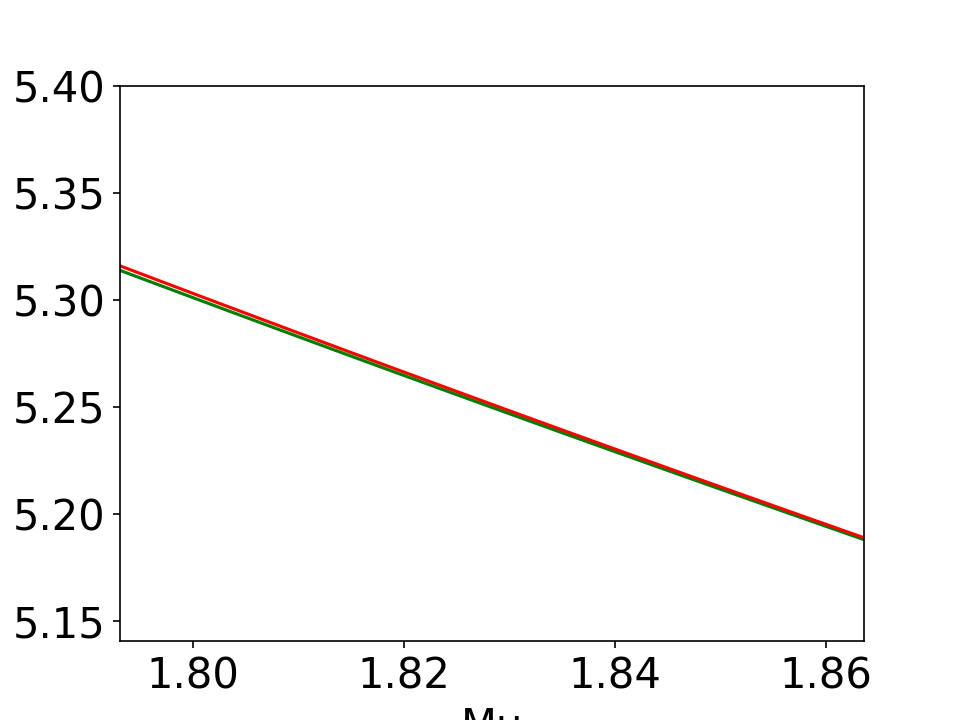

(4.0, 6.0)

In [42]:
# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig,ax=plt.subplots()
R=1000
phi=5
mu = np.linspace(0,3,2000)
x1 = np.linspace(4,R-1,20000)
mu,x1 = np.meshgrid(mu,x1)
f = 3*np.cbrt(mu/2)**2 + phi - (x1-1)**(-2) - mu*(x1-1)
g = phi - (x1-1)**(-2) - mu*(x1-1) + 1 + mu
# ax.plot_surface(mu,x1,g,cmap='coolwarm')
ax.contour(mu,x1,f,colors='g',levels=[0])
ax.contour(mu,x1,g,colors='r',levels=[0])
ax.set_xlabel("Mu")
ax.set_ylabel("x1")
ax.set_ylim([4,6])
# ax.view_init(90,-90)

In [17]:
def f(var,arg):
    mu,x1=var
    R,phi=arg
    return 3*np.cbrt(mu/2)**2 + phi - (x1-1)**(-2) - mu*(x1-1)

In [ ]:
mu = np.linspace(0.01,2.5,1000)
fig,ax=plt.subplots(figsize=(5,5))
@widgets.interact(R=(1,10,1),phi=(0,10,0.5))
def update(R=5,phi=5):
    ax.clear()
    gmin_dd = np.array([minimize_scalar(f_dd,method='bounded',
                                        bounds=(-R-0.5,R+x1+0.5),
                                        args=[Mu,x1,R,phi]).x for Mu in mu])
    gmin_dc = np.array([minimize_scalar(f_dc,method='bounded',
                                        bounds=(-R-0.5,R+x1+0.5),
                                        args=[Mu,x1,R,phi]).x for Mu in mu])
    gmin_cd = np.array([minimize_scalar(f_cd,method='bounded',
                                        bounds=(-R-0.5,R+x1+0.5),
                                        args=[Mu,x1,R,phi]).x for Mu in mu])
    gmin_cc = np.array([minimize_scalar(f_cc,method='bounded',
                                        bounds=(-R-0.5,R+x1+0.5),
                                        args=[Mu,x1,R,phi]).x for Mu in mu])
    ax.plot(mu,gmin_dd,c='crimson',label='DD')
    ax.plot(mu,gmin_dc,c='rebeccapurple',label='DC')
    ax.plot(mu,gmin_cd,c='royalblue',label='CD')
    ax.plot(mu,gmin_cc,c='forestgreen',label='CC')
#     xlim = ax.get_xlim()
    ax.legend(fontsize=10)
    ax.set_ylim([-2,12])
    ax.set_xlim([-.2,2.7])
    ax.set_xlabel("Migration Cost $\mu$")
    ax.set_ylabel("Position $x_*$")
    
#     ax.set_xscale('log')
    plt.show()

In [8]:
p = [1 for i in range(10) if i<6] + [0 for i in range(10) if i>=6]
print(p)

[1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


In [5]:
mu = np.linspace(0.001,10,4000)
R=5
phi=5
gmin_dd=[0]*5
gmin_dc=[0]*5
gmin_cd=[0]*5
gmin_cc=[0]*5
for x1 in trange(1,6):
    gmin_dd[x1-1] = np.array([minimize_scalar(f_dd,method='bounded',
                                        bounds=(-R-0.5,R+x1+0.5),
                                        args=[Mu,x1,R,phi]).x for Mu in mu])
    gmin_dc[x1-1] = np.array([minimize_scalar(f_dc,method='bounded',
                                        bounds=(-R-0.5,R+x1+0.5),
                                        args=[Mu,x1,R,phi]).x for Mu in mu])
    gmin_cd[x1-1] = np.array([minimize_scalar(f_cd,method='bounded',
                                        bounds=(-R-0.5,R+x1+0.5),
                                        args=[Mu,x1,R,phi]).x for Mu in mu])
    gmin_cc[x1-1] = np.ones(len(mu))*x1
#     gmin_cc[x1-1] = np.array([minimize_scalar(f_cc,method='bounded',
#                                         bounds=(-R-0.5,R+x1+0.5),
#                                         args=[Mu,x1,R,phi]).x for Mu in mu])
gmin_cc[0]=np.ones(len(mu))
gmin_cc[1] = np.array([1]*len(mu[mu<=phi/(2-1)])+[2]*len(mu[mu>phi]))


100%|█████████████████████████████████████████████| 5/5 [00:38<00:00,  7.80s/it]


/home/jbara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


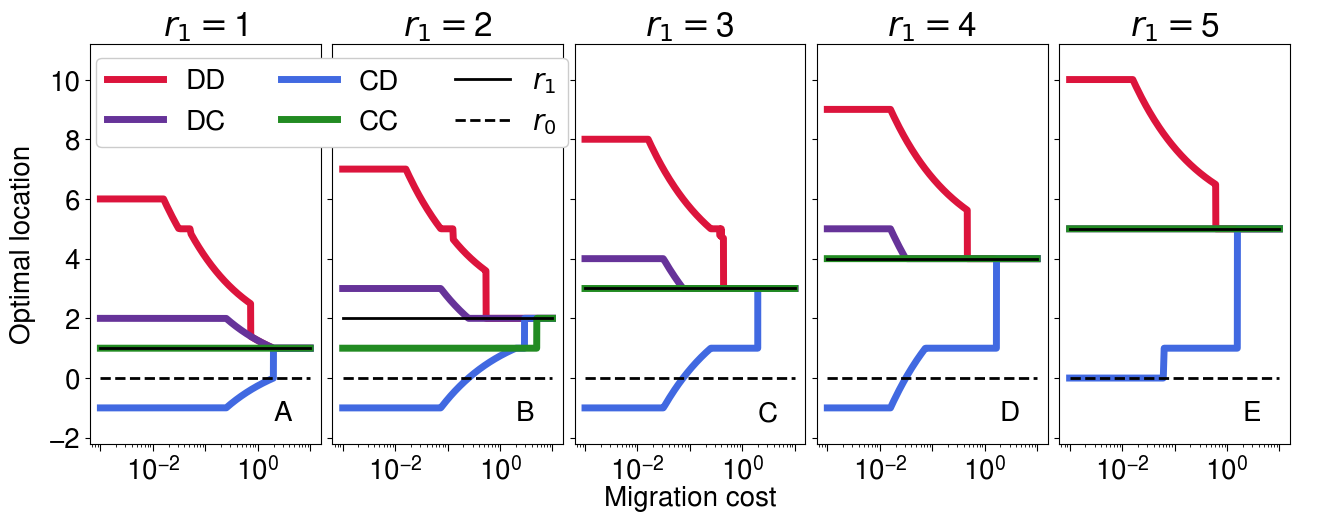

In [10]:
fig,axs=plt.subplots(figsize=(15,5),ncols=5,sharey=True,sharex=True)
fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.05,
                    hspace=0.06)
letters=['A','B','C','D','E']
for i in range(axs.shape[0]):
    shift=0
    l2=axs[i].plot(mu,gmin_dd[i]-shift,c='crimson',label='DD',lw=5)
    l3=axs[i].plot(mu,gmin_dc[i]-shift,c='rebeccapurple',label='DC',lw=5)
    l4=axs[i].plot(mu,gmin_cd[i]-shift,c='royalblue',label='CD',lw=5)
    l5=axs[i].plot(mu,gmin_cc[i]-shift,c='forestgreen',label='CC',lw=5)
    l1=axs[i].plot([0.001,10],[i+1-shift,i+1-shift],'k',label='$r_1$',lw=2)
    l6=axs[i].plot([0.001,10],[-shift,-shift],'k--',label='$r_0$',lw=2)
    axs[i].set_title(f'$r_1=${(i+1)}')
#     xlim = ax.get_xlim()
#     axs[i].legend(fontsize=15)
#     axs[i].set_ylim([-6.5,6.5])
    
    axs[i].set_ylim([-2.2,11.2])
#     axs[i].set_xlim([0.01,4.2])
    axs[i].set_xscale('log')
    locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
    locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
    axs[i].xaxis.set_major_locator(locmaj)
    axs[i].xaxis.set_minor_locator(locmin)
    axs[i].xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    axs[i].tick_params(axis='x', which='major', length=5)
    axs[i].text(3,-1.2,letters[i],va='center',ha='center')
    for label in axs[i].xaxis.get_ticklabels()[::2]:
        label.set_visible(False)
#     axs[i].set_xticklabels([0.01,1])
#     axs[i].set_xticks([1e-2,1e1])
# axs[0].legend(ncol=6,loc='upper left')
ax_outer=fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
# plt.xlabel("common X",fontsize='medium')
plt.ylabel("Optimal location")
plt.xlabel("Migration cost")
fig.legend([l2,l3,l4,l5,l1,l6],labels=['DD','DC','CD','CC','$r_1$','$r_0$'],ncol=3,loc='upper left',
           bbox_to_anchor=(0.095, 0.9),framealpha=1)
# fig.legend([l2,l3,l4,l5,l1,l6],labels=['DD','DC','CD','CC','$r_1$','$r_0$'],ncol=3,loc='lower left',
#            bbox_to_anchor=(0.095, 0.085),framealpha=1)
# fig.savefig(f"Global min 5plots.eps",format='eps',bbox_inches='tight')
# fig.savefig(f"Global min 5plots.png",bbox_inches='tight')

In [114]:
print([mu[:-1][np.diff(gmin_dd[i])<-0.5] for i in range(len(gmin_dd))])

[array([0.73110953]), array([0.53858065]), array([0.43606527]), array([0.46606977]), array([0.60859115])]


# messing about integrals

In [136]:
print(np.arange(1,6,0.1))

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5
 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9]


In [166]:
mu = np.linspace(0.001,10,1000)
R=5
phi=5
X1 = np.arange(1,6,0.2)
gmin_dd=[0]*len(X1)
gmin_dc=[0]*len(X1)
gmin_cd=[0]*len(X1)
gmin_cc=[0]*len(X1)
for i,x1 in tqdm.tqdm(enumerate(X1)):
    gmin_dd[i] = np.array([minimize_scalar(f_dd,method='bounded',
                                        bounds=(-R-0.5,R+x1+0.5),
                                        args=[Mu,x1,R,phi]).x for Mu in mu])
    gmin_dc[i] = np.array([minimize_scalar(f_dc,method='bounded',
                                        bounds=(-R-0.5,R+x1+0.5),
                                        args=[Mu,x1,R,phi]).x for Mu in mu])
    gmin_cd[i] = np.array([minimize_scalar(f_cd,method='bounded',
                                        bounds=(-R-0.5,R+x1+0.5),
                                        args=[Mu,x1,R,phi]).x for Mu in mu])
    gmin_cc[i] = np.array([minimize_scalar(f_cc,method='bounded',
                                        bounds=(-R-0.5,R+x1+0.5),
                                        args=[Mu,x1,R,phi]).x for Mu in mu])
# gmin_cc[np.arange(1,6,0.1)==2.0]=np.ones(len(mu))
for x1 in X1[(X1<=2)&(X1>1)]:
    gmin_cc[np.where(X1==x1)[0][0]] = np.array([1]*len(mu[mu<=phi/(x1-1)])+[2]*len(mu[mu>phi/(x1-1)]))
# gmin_cc[X1==2.0] = np.array([1]*len(mu[mu<=phi/(2-1)])+[2]*len(mu[mu>phi]))

25it [00:58,  2.33s/it]


In [79]:
integrals = {'dd':[integrate.simpson(gmin_dd[i].reshape(mu.shape)-x1,mu) for i,x1 in enumerate(X1)],
              'dc':[integrate.simpson(gmin_dc[i].reshape(mu.shape)-x1,mu) for i,x1 in enumerate(X1)],
              'cd':[integrate.simpson(gmin_cd[i].reshape(mu.shape)-x1,mu) for i,x1 in enumerate(X1)],
              'cc':[integrate.simpson(gmin_cc[i].reshape(mu.shape)-x1,mu) for i,x1 in enumerate(X1)]} 

mu_s = {'dd':[gmin_dd[i][np.where(np.abs(gmin_dd[i]-x1)<0.01)[0][0]] for i,x1 in enumerate(X1)],
        'dc':[gmin_dc[i][np.where(np.abs(gmin_dd[i]-x1)<0.01)[0][0]] for i,x1 in enumerate(X1)],
        'cd':[gmin_cd[i][np.where(np.abs(gmin_dd[i]-x1)<0.01)[0][0]] for i,x1 in enumerate(X1)],
        'cc':[gmin_cc[i][np.where(np.abs(gmin_dd[i]-x1)<0.01)[0][0]] for i,x1 in enumerate(X1)]
       }

(0.0, 30.0)

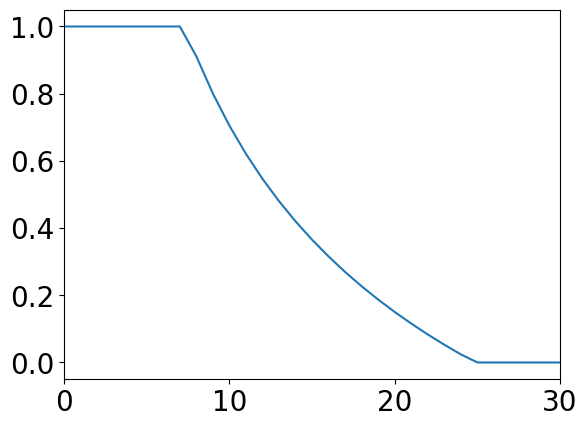

In [201]:
plt.plot((np.abs(gmin_dc[5]-X1[5])))
# plt.plot(np.diff(np.abs(gmin_dc[5]-X1[5])))
plt.xlim([0,30])

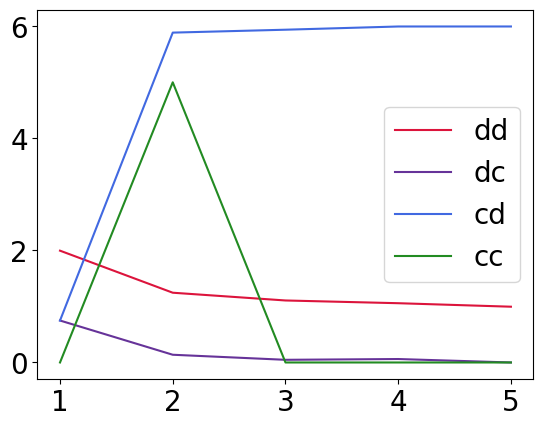

In [80]:
cols={'dd':'crimson','dc':'rebeccapurple','cd':'royalblue','cc':'forestgreen'}
for k in integrals:
    plt.plot(X1,np.abs(integrals[k]),label=k,color=cols[k])
    
plt.legend()

/home/jbara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


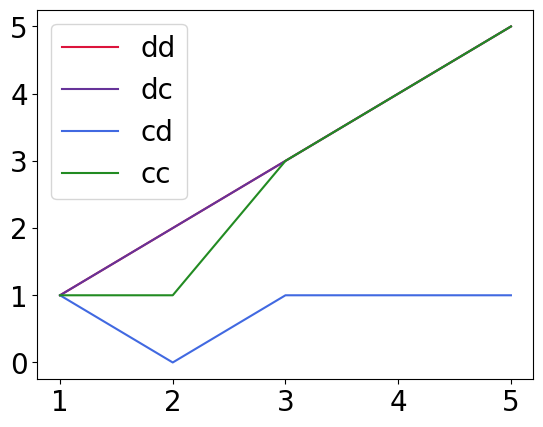

In [81]:
cols={'dd':'crimson','dc':'rebeccapurple','cd':'royalblue','cc':'forestgreen'}
for k in mu_s:
    plt.plot(X1,np.abs(mu_s[k]),label=k,color=cols[k])
    
plt.legend()

/home/jbara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


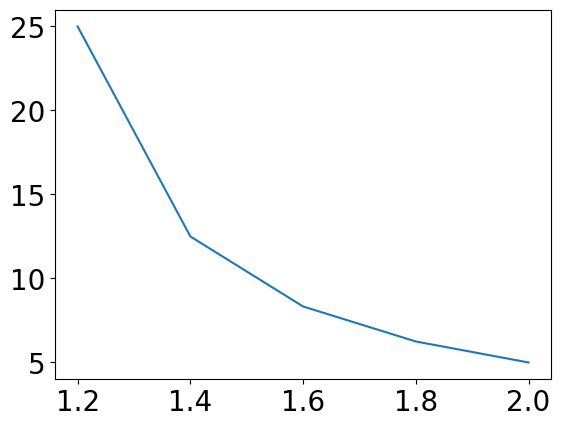

In [205]:
plt.plot(X1[X1<=2],phi/(X1[(X1<=2)]-1))
plt.plot(X1,)

# Discretised global minima

In [6]:
mu = np.logspace(-3,1,num=6000)
R=5
phi=5
gmin_dd=[0]*5
gmin_dc=[0]*5
gmin_cd=[0]*5
gmin_cc=[0]*5
candidate_x = np.arange(-3,12)
for x1 in trange(1,6):
    fcc=np.array([v_cc(candidate_x,(Mu,x1,R,phi)) for Mu in mu])
    fcd=np.array([v_cd(candidate_x,(Mu,x1,R,phi)) for Mu in mu])
    fdc=np.array([v_dc(candidate_x,(Mu,x1,R,phi)) for Mu in mu])
    fdd=np.array([v_dd(candidate_x,(Mu,x1,R,phi)) for Mu in mu])

    gmin_dd[x1-1] = np.array([candidate_x[fdd[i]==fdd[i].min()] for i in range(len(mu))])
    gmin_dc[x1-1] = np.array([candidate_x[fdc[i]==fdc[i].min()] for i in range(len(mu))])
    gmin_cd[x1-1] = np.array([candidate_x[fcd[i]==fcd[i].min()] for i in range(len(mu))])
    gmin_cc[x1-1] = np.array([candidate_x[fcc[i]==fcc[i].min()] for i in range(len(mu))])
#     gmin_cc[x1-1] = np.array([minimize_scalar(f_cc,method='bounded',
#                                         bounds=(-R-0.5,R+x1+0.5),
#                                         args=[Mu,x1,R,phi]).x for Mu in mu])
gmin_cc[0]=np.ones(len(mu))
gmin_cc[1] = np.array([1]*len(mu[mu<=phi/(2-1)])+[2]*len(mu[mu>phi]))


100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.41it/s]


/home/jbara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


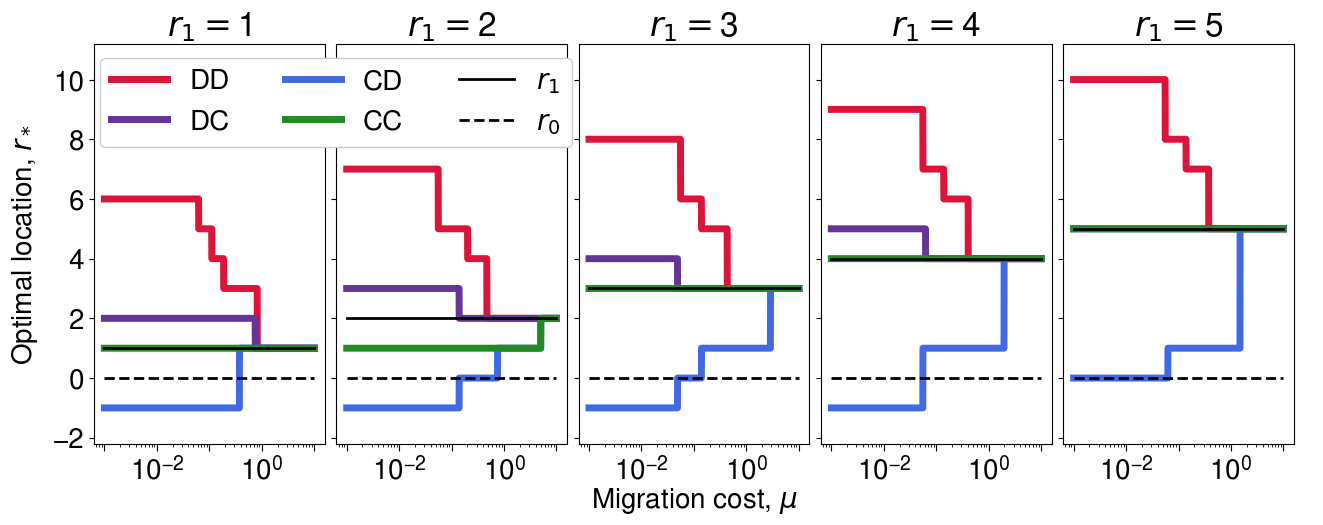

In [10]:
fig,axs=plt.subplots(figsize=(15,5),ncols=5,sharey=True,sharex=True)
fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.05,
                    hspace=0.06)
for i in range(axs.shape[0]):
    shift=0
    l2=axs[i].plot(mu,gmin_dd[i]-shift,c='crimson',label='DD',lw=5)
    l3=axs[i].plot(mu,gmin_dc[i]-shift,c='rebeccapurple',label='DC',lw=5)
    l4=axs[i].plot(mu,gmin_cd[i]-shift,c='royalblue',label='CD',lw=5)
    l5=axs[i].plot(mu,gmin_cc[i]-shift,c='forestgreen',label='CC',lw=5)
    l1=axs[i].plot([0.001,10],[i+1-shift,i+1-shift],'k',label='$r_1$',lw=2)
    l6=axs[i].plot([0.001,10],[-shift,-shift],'k--',label='$r_0$',lw=2)
    axs[i].set_title(f'$r_1=${(i+1)}')
#     xlim = ax.get_xlim()
#     axs[i].legend(fontsize=15)
#     axs[i].set_ylim([-6.5,6.5])
    
    axs[i].set_ylim([-2.2,11.2])
#     axs[i].set_xlim([0.01,4.2])
    axs[i].set_xscale('log')
    locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
    locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
    axs[i].xaxis.set_major_locator(locmaj)
    axs[i].xaxis.set_minor_locator(locmin)
    axs[i].xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    axs[i].tick_params(axis='x', which='major', length=5)
    for label in axs[i].xaxis.get_ticklabels()[::2]:
        label.set_visible(False)
#     axs[i].set_xticklabels([0.01,1])
#     axs[i].set_xticks([1e-2,1e1])
# axs[0].legend(ncol=6,loc='upper left')
ax_outer=fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
# plt.xlabel("common X",fontsize='medium')
plt.ylabel("Optimal location, $r_*$",size='medium')
plt.xlabel("Migration cost, $\mu$",size='medium')
fig.legend([l2,l3,l4,l5,l1,l6],labels=['DD','DC','CD','CC','$r_1$','$r_0$'],ncol=3,loc='upper left',
           bbox_to_anchor=(0.095, 0.9),framealpha=1)
# fig.legend([l2,l3,l4,l5,l1,l6],labels=['DD','DC','CD','CC','$r_1$','$r_0$'],ncol=3,loc='lower left',
#            bbox_to_anchor=(0.095, 0.085),framealpha=1)
# fig.savefig(f"Global min 5plots discrete.png",bbox_inches='tight')